# Control flow in Python

Flow control refers to  

- the way a computer is programmed to make decisions   
- the mechanisms used to determine the execution pathway of a program  


In Python there are the following statements for flow control:  

|  Conditional  |  Transfer     |  Iterative    |  Exception    |
| :-----------: | :-----------: | :-----------: | :-----------: |
| if            | break         | for           |               |
| if-elif       | continue      | while         |  try-except   |  
| if-elif-else  | pass          |               |               |    

This tutorial will cover three examples to introduce the use of above statements.

## 1. Extracting information from files

In the local directory, you will see a file named "hexagon.inp".  

It contains the coordinates of a group of points called nodes that are inside the red square cell, as shown in the following picture  

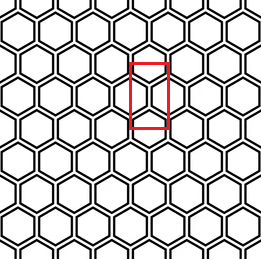

 - We want to to read the (x, y) pair of coordinates and then, replicate the group of points to form a honeycomb.  
 
 
 - The data structure inside the file is  
 
*Node   
       1,$\;\;\;\;$ 	  8.22724152,$\;\;\;\;$ 	 4.75000000   
       2,$\;\;\;\;$ 	  8.27724171,$\;\;\;\;$ 	 4.66339731   
       3,$\;\;\;\;$ 	  8.32724094,$\;\;\;\;$ 	 4.57679510   
       4,$\;\;\;\;$ 	  8.37724113,$\;\;\;\;$ 	 4.49019241   
       5,$\;\;\;\;$ 	  8.42724133,$\;\;\;\;$ 	 4.40358973   
       6,$\;\;\;\;$ 	  8.47724152,$\;\;\;\;$ 	 4.31698751   
       7,$\;\;\;\;$ 	  8.52724171,$\;\;\;\;$ 	 4.23038483   
       8,$\;\;\;\;$ 	  8.57724094,$\;\;\;\;$ 	 4.14378214   
       9,$\;\;\;\;$ 	  8.62724113,$\;\;\;\;$ 	 4.05717945   
      10,$\;\;\;\;$       8.67724133,$\;\;\;\;$ 	 3.97057724   
      11,$\;\;\;\;$       8.72724152,$\;\;\;\;$ 	 3.88397455        
 
 **Let's start!**

We can use `pandas` package to open the file with the function `read_csv()`.  

This will store the data in a tabular manner known as pandas "dataframe".

In [68]:
import pandas as pd

df = pd.read_csv("hexagon.inp", delimiter = ", ", engine='python', 
                 skiprows = 1, header = None, names = ['x', 'y'])
df = df.reset_index()
df = df.drop(['index'], axis=1)
# ----- read_csv() options ----- #
#
# delimiter = ", " 
# --> it is used to detect the separation of the data for each column
# engine = python 
# --> needed for separators or delimiters longer than 1 character 
# skiprows = 1 
# --> skips the first row corresponding to *Node
# header = None 
# --> to specify the column names explicity in "names"
# -------------------------------

print(df)


              x          y
0      8.227242   4.750000
1      8.277242   4.663397
2      8.327241   4.576795
3      8.377241   4.490192
4      8.427241   4.403590
...         ...        ...
13550 -8.663001 -21.682600
13551 -8.762452 -21.682600
13552 -8.861902 -21.682600
13553 -8.961353 -21.682600
13554 -9.060803 -21.682600

[13555 rows x 2 columns]


Now you can manipulate your data as in a spreadsheet.  

In [ ]:
# x column
print(df['x'])

In [ ]:
# data in row 1, column 'x'
print(df['x'][1])

# another syntax
print(df.x[1])

Another option to read and extract the data from a file is using the function `open()` and the method `readlines()`.

In [ ]:
# using "with" ensures the file is closed
# once we finish extracting the information

with open('hexagon.inp', 'r', encoding = 'utf-8') as file:
    # the method readlines() stores all the data in a list
    coord_list = file.readlines()

print('Data is now = ', type(coord_list), '\n')
print('Number of elements in list =', len(coord_list), '\n')
print('First 10 elements = \n', coord_list[0:10], '\n') # Just the first 10 elements

If you noticed, now we have a list `coord_list` where every element corresponds to a line of the file. However, the data is stored as strings...  

How do we convert it to numeric type?  

We can apply `eval()` method to parse a string-based input and evaluate it as a Python expression. However, we should apply it to every element in the list.  

This is the time for including statements to control the flow of the code. Take a look at the follwing snippet 

In [ ]:
# iterative statement: for loop
to_delete = []

for i in range(len(coord_list)):
    # exception statement: 
    # if an element does not contain numeric data, eval() will raise an error
    try:
        coord_list[i] = eval((coord_list[i]))
    except:
        to_delete.append(coord_list[i])

print('Lines to delete = ', to_delete, '\n')
# --------- Redefining the list --------------
# (without the elements that are not numeric)

[coord_list.remove(elem) for elem in to_delete] # this is called a comprehension
# Comprehensions are a syntax for spelling out simple for loops in a single expression

# with eval() method, now every element is a tuple of the form (index, x, y)
print('Type of the updated list = ', type(coord_list[0]), '\n') 
print('First 10 elements = , \n', coord_list[0:10], '\n')
# ---------------------------------------------


In [ ]:
# Storing the x,y data in independent lists
x = []
y = []
[x.append(xcoord[1]) for xcoord in coord_list]
[y.append(ycoord[2]) for ycoord in coord_list]

print(x[0:10])

Now, let's plot the group of points that we have read from `hexagon.inp` using the two different approaches.

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x = x, 
            y = y,
            s = 1,
            alpha = 1)
plt.show()

In [ ]:
plt.scatter(x = df['x'], 
            y = df['y'],
            s = 1,
            alpha = 1)
plt.show()

### Time to replicate the square cell! (8x8)

- We need to calculate the length of the square cell in x and y direction  
- Apply this distance to the group of points as an offset in the x, y-direction  
- Make sure we do not introduce repeated data points (watch out for the boundaries!)

In [69]:
# A parameter to define the number of cells or lattice dimension
cellx = 3 ## 2**3 = 8

# Length of the square cell
x_max = df.x.max()
x_min = df.x.min()
y_max = df.y.max()
y_min = df.y.min()

x_dist = x_max - x_min
y_dist = y_max - y_min

print('length in x = ', x_dist, '\n')
print('length in y = ', y_dist, '\n')


length in x =  18.32050896 

length in y =  31.73205081 



In [70]:
# Applying the offset
power = 0         # 2**(power+1) x 2**(power+1) cells each iteration
while power < cellx:
    # Replicating in x
    df2 = df.copy()
    df2.x += x_dist*(2**power)
    df = df.append(df2, ignore_index = True)
    # Replicating in y
    df3 = df.copy()
    df3.y += y_dist*(2**power)
    df = df.append(df3, ignore_index = True)
    # counter   
    power += 1
    
print(df)


                 x           y
0         8.227242    4.750000
1         8.277242    4.663397
2         8.327241    4.576795
3         8.377241    4.490192
4         8.427241    4.403590
...            ...         ...
867515  119.580562  200.441756
867516  119.481111  200.441756
867517  119.381660  200.441756
867518  119.282209  200.441756
867519  119.182759  200.441756

[867520 rows x 2 columns]


From previous replication, we know that with every iteration we have duplication of points over the lines highlighted in red, yellow and green. 

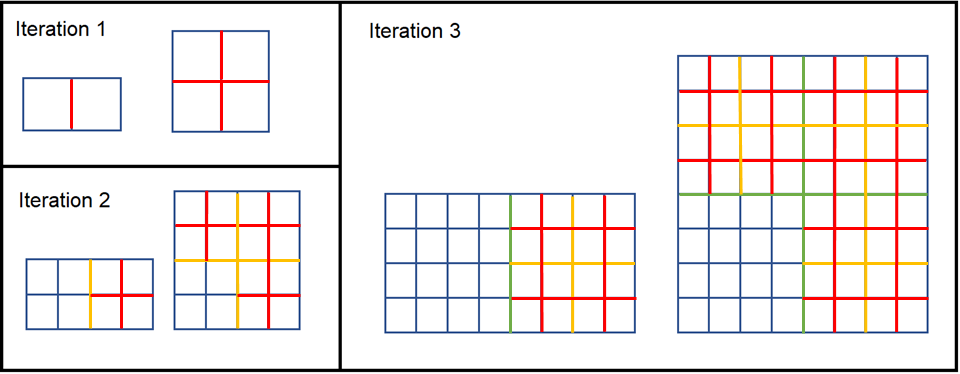



In [71]:
# Duplicated values in dataframe 
duplicated = df.duplicated().sum()

if duplicated > 0: 
    print('Total duplicated = ', duplicated)
    print('Total points = ', len(df))

df = df.drop_duplicates()  
print('Total points without duplicated values', len(df))

Total duplicated =  12438
Total points =  867520
Total points without duplicated values 855082


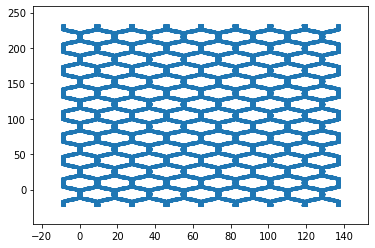

In [72]:
plt.scatter(x = df['x'], 
            y = df['y'],
            s = 1,
            alpha = 1)
plt.gca().relim()
plt.gca().autoscale_view()
plt.show()

## 2. Programming an elevator  

